In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the path to your dataset folders
data_folder = 'F:/jupyter/tester01'
folders = ['normal', 'cataract', 'surgery']

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels
for label, folder in enumerate(folders):
    folder_path = os.path.join(data_folder, folder)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        # Read and resize the image (adjust the dimensions as needed)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize to 224x224 pixels
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to [0, 1]
images = images / 255.0

# Perform one-hot encoding for categorical labels
labels = to_categorical(labels)

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(3, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     

Epoch 1/10


67/67 [==============================] - 67s 889ms/step - loss: 0.5832 - accuracy: 0.7589 - val_loss: 0.2985 - val_accuracy: 0.9022
Epoch 2/10
67/67 [==============================] - 55s 817ms/step - loss: 0.2758 - accuracy: 0.9025 - val_loss: 0.2289 - val_accuracy: 0.9348
Epoch 3/10
67/67 [==============================] - 54s 811ms/step - loss: 0.1901 - accuracy: 0.9328 - val_loss: 0.1693 - val_accuracy: 0.9478
Epoch 4/10
67/67 [==============================] - 54s 808ms/step - loss: 0.1688 - accuracy: 0.9417 - val_loss: 0.1795 - val_accuracy: 0.9391
Epoch 5/10
67/67 [==============================] - 54s 807ms/step - loss: 0.1604 - accuracy: 0.9408 - val_loss: 0.2008 - val_accuracy: 0.9478
Epoch 6/10
67/67 [==============================] - 54s 804ms/step - loss: 0.1122 - accuracy: 0.9627 - val_loss: 0.1930 - val_accuracy: 0.9500
Epoch 7/10
67/67 [==============================] - 54s 803ms/step - loss: 0.0706 - accuracy: 0.9762 - val_loss: 0.1590 - val_accuracy: 0.95

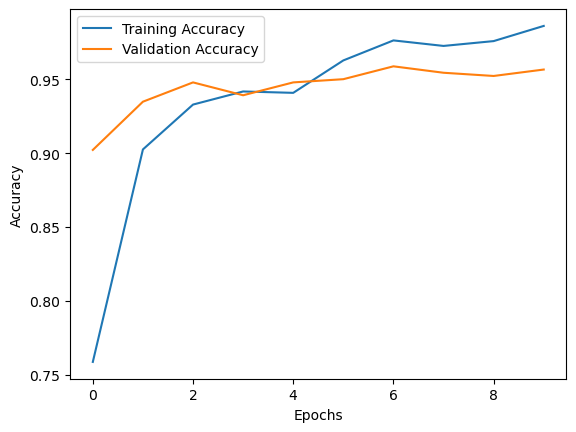

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
# Evaluate the model on new data (or test set)
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

# Calculate classification report
report = classification_report(true_classes, predicted_classes)
print("Classification Report:")
print(report)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Calculate additional metrics if needed
# precision, recall, F1-score, etc.

15/15 [==============================] - 2s 142ms/step - loss: 0.1980 - accuracy: 0.9565
Test Accuracy: 95.65%
15/15 [==============================] - 2s 138ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       110
           1       0.97      0.94      0.96       190
           2       0.93      0.97      0.95       160

    accuracy                           0.96       460
   macro avg       0.96      0.96      0.96       460
weighted avg       0.96      0.96      0.96       460

Confusion Matrix:
[[106   1   3]
 [  2 179   9]
 [  1   4 155]]


In [8]:
# Save the model to a file
model.save('cataract_detection_model.keras')